In [1]:
#chargement des modules pour le DL
import tensorflow as tf
from tensorflow import keras

#chargement des modules pour les données et leur preprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#importation des données
housing = fetch_california_housing()

#construction des tensors
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

#construction du jeu de données de validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

#normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
#construction de l'architecture du réseau
entrees = keras.layers.Input(shape = (X_train.shape[1], )) 
couche1 = keras.layers.Dense(30, activation = "relu")(entrees)
couche2 = keras.layers.Dense(30, activation = "relu")(couche1)
concat = keras.layers.Concatenate()([entrees, couche2])
sortie = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [entrees] , outputs = [sortie] )

In [4]:
#resumé du modèle
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

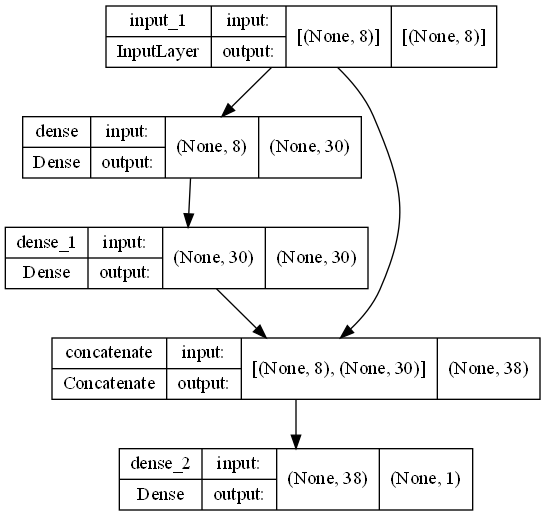

In [5]:
#visualisation du rna
keras.utils.plot_model(model, show_shapes = True)

In [6]:
#compilation du modèle
model.compile(optimizer="sgd", loss = "mean_squared_error")

In [7]:
#entrainement du modèle
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 20)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.9320 - val_loss: 1.1622
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] 

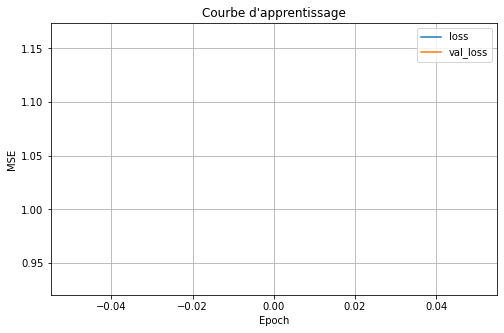

In [8]:
#courbe d'apprentissage
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5), grid = True, title = "Courbe d'apprentissage", xlabel = "Epoch",
                                  ylabel = "MSE")
plt.show()

In [9]:
#évaluation du modèle
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: nan


nan

In [10]:
#prédiction avec le modèle
X_new = X_test[:3]
model.predict(X_new)

array([[nan],
       [nan],
       [nan]], dtype=float32)

In [11]:
#vraies étiquettes
y_test[:3]

array([0.53 , 1.808, 1.369])